# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
# Remove indexes from features
data = dataset[:, 1:-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 18) (846,)
(549, 18) (549,) (297, 18) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [49]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,89,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197
1,101,56,101,231,72,10,217,31,24,171,232,698,216,72,2,6,187,197
2,99,57,109,220,66,11,221,30,25,176,234,725,236,70,10,25,188,200
3,89,43,85,160,64,11,155,43,19,151,173,356,174,72,5,9,185,196
4,73,37,53,111,54,6,126,55,18,128,135,227,147,82,1,15,176,184
5,97,48,94,198,63,9,181,36,21,155,200,494,189,64,20,11,199,203
6,83,37,54,131,61,4,135,50,18,127,152,271,141,85,3,6,180,183
7,98,38,66,130,55,7,130,51,18,138,160,251,123,69,3,12,191,194
8,79,43,72,141,62,8,153,44,19,144,175,344,174,78,0,8,182,188
9,89,36,72,141,56,7,138,48,18,126,163,286,130,72,1,1,187,192


Methods `describe` and `info` deliver some useful information.

In [50]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,93.861566,44.883424,82.511840,170.014572,61.948998,8.653916,169.582878,40.684882,20.639344,147.989071,189.522769,443.828780,174.956284,72.460838,6.378871,12.524590,189.049180,195.739526
std,8.430640,6.222243,15.677589,33.312222,8.249151,4.913530,33.062413,7.710369,2.585964,14.651420,31.275237,176.192961,32.454936,7.741773,4.832825,8.803296,6.137368,7.324311
min,73.000000,33.000000,40.000000,104.000000,48.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,182.000000
25%,87.000000,40.000000,70.000000,143.000000,57.000000,7.000000,147.000000,33.000000,19.000000,136.000000,168.000000,319.000000,151.000000,67.000000,2.000000,6.000000,184.000000,191.000000
50%,93.000000,44.000000,80.000000,169.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,366.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,100.000000,50.000000,98.000000,195.000000,65.000000,10.000000,200.000000,46.000000,23.000000,160.000000,217.000000,600.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,117.000000,59.000000,110.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,186.000000,320.000000,1018.000000,261.000000,135.000000,22.000000,41.000000,204.000000,211.000000


In [51]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
dtypes: int64(18)
memory usage: 77.3 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Remove mean and divide by std, so every feature is equivalent
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train_pd = pd.DataFrame(X_train)

X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02
mean,8.380263e-16,3.947460e-16,-4.497515e-16,3.429760e-16,4.335734e-16,-7.927276e-17,-1.553099e-16,2.750279e-16,-3.785679e-16,8.995031e-16,-1.747236e-16,1.617811e-17,-1.585455e-16,-4.724009e-16,-1.294249e-17,-6.066792e-17,2.125804e-15,1.197180e-15
std,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00
min,-2.476751e+00,-1.911571e+00,-2.714104e+00,-1.983500e+00,-1.692504e+00,-1.355438e+00,-1.743230e+00,-1.906300e+00,-1.408629e+00,-2.048704e+00,-1.904927e+00,-1.476028e+00,-2.034095e+00,-1.740314e+00,-1.321109e+00,-1.424013e+00,-2.128124e+00,-1.877590e+00
25%,-8.146267e-01,-7.855492e-01,-7.987995e-01,-8.116903e-01,-6.004875e-01,-3.369114e-01,-6.836607e-01,-9.976034e-01,-6.345175e-01,-8.190336e-01,-6.888004e-01,-7.091238e-01,-7.388131e-01,-7.060163e-01,-9.068949e-01,-7.418290e-01,-8.234450e-01,-6.476853e-01
50%,-1.022879e-01,-1.421079e-01,-1.603646e-01,-3.048422e-02,-1.151468e-01,-1.332062e-01,-3.809266e-01,3.005342e-01,-2.474618e-01,-1.358834e-01,-3.367637e-01,-4.421275e-01,-6.033191e-02,-1.888676e-01,-7.846678e-02,-1.733420e-01,-8.020569e-03,1.722514e-01
75%,7.287741e-01,8.230539e-01,9.888182e-01,7.507219e-01,3.701938e-01,2.742043e-01,9.208300e-01,6.899755e-01,9.137053e-01,8.205268e-01,8.793631e-01,8.871731e-01,7.106694e-01,3.282811e-01,5.428543e-01,7.362373e-01,6.443190e-01,7.188759e-01
max,2.747067e+00,2.270797e+00,1.754940e+00,4.897124e+00,9.227660e+00,9.440941e+00,2.888602e+00,2.637182e+00,3.236039e+00,2.596717e+00,4.175707e+00,3.261736e+00,2.653593e+00,8.085512e+00,3.235246e+00,3.237580e+00,2.438253e+00,2.085437e+00


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score as sk_f1_score
from sklearn.metrics import accuracy_score as sk_accuracy_score

estimator = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=1000, random_state=199)
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10, 15, 20]
}

search = GridSearchCV(estimator, param_grid, cv=5)
best_model = search.fit(X_train, y_train)
print('Best params of logistic regression: ', best_model.best_params_)

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)

accuracy_score = sk_accuracy_score(y_test, y_pred)
f1_score = sk_f1_score(y_test, y_pred, average='weighted')
print('accuracy score = {}, f1_score = {}'.format(accuracy_score, f1_score))

Best params of logistic regression:  {'C': 5, 'penalty': 'l2'}
accuracy score = 0.7811447811447811, f1_score = 0.7765176433785042


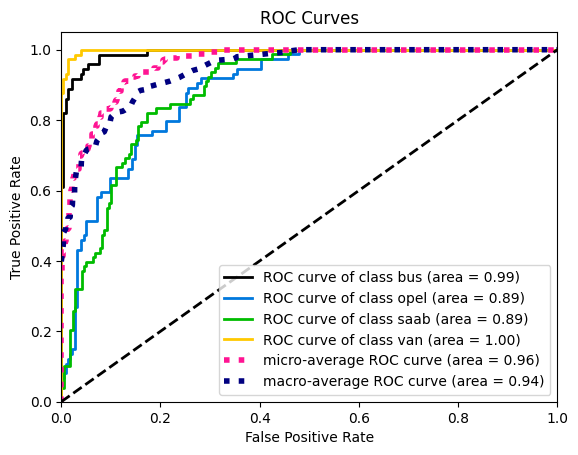

In [54]:
import scikitplot
import matplotlib.pyplot as plt

scikitplot.metrics.plot_roc(y_test, y_proba)
plt.show()

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

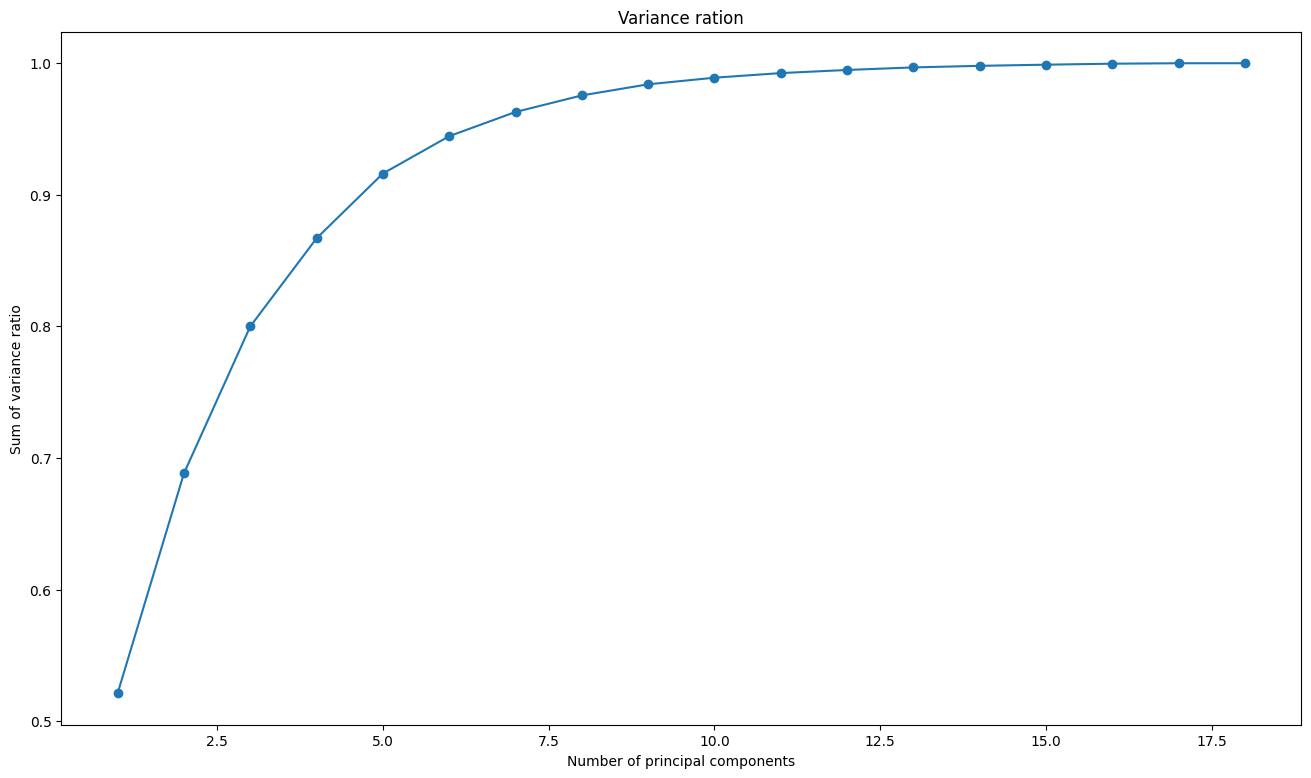

In [55]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
variance_ratio = pca.explained_variance_ratio_

grid = np.linspace(1, variance_ratio.shape[0], num = variance_ratio.shape[0])

plt.figure(figsize=(16,9))
plt.plot(grid, np.cumsum(variance_ratio))
plt.scatter(grid, np.cumsum(variance_ratio))
plt.xlabel('Number of principal components')
plt.ylabel('Sum of variance ratio')
plt.title('Variance ration')
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [56]:
pca = PCA(n_components=11) # 11 principal components look good enough
pca.fit(X_train)
pca_X_train = pca.transform(X_train)
pca_X_test = pca.transform(X_test)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

Best params of logistic regression with PCA:  {'C': 15, 'penalty': 'l1'}
accuracy score = 0.7239057239057239, f1_score = 0.7184126870104387


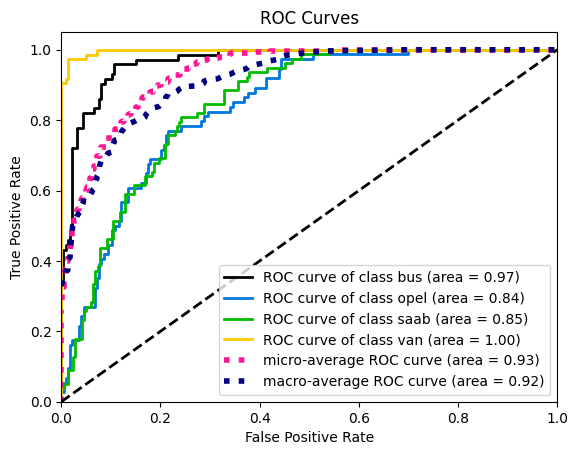

In [57]:
estimator = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=1000, random_state=199)
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10, 15, 20]
}

search = GridSearchCV(estimator, param_grid, cv=5)
best_model = search.fit(pca_X_train, y_train)
print('Best params of logistic regression with PCA: ', best_model.best_params_)

y_pred = best_model.predict(pca_X_test)
y_proba = best_model.predict_proba(pca_X_test)

accuracy_score = sk_accuracy_score(y_test, y_pred)
f1_score = sk_f1_score(y_test, y_pred, average='weighted')
print('accuracy score = {}, f1_score = {}'.format(accuracy_score, f1_score))

scikitplot.metrics.plot_roc(y_test, y_proba)
plt.show()

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

Best params of DecisionTreeClassifier:  {'criterion': 'entropy', 'max_depth': 12}
accuracy score = 0.696969696969697, f1_score = 0.6931280215555904


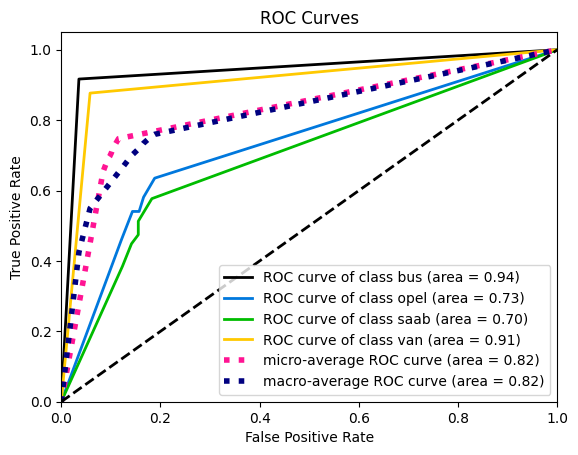

In [58]:
from sklearn.tree import DecisionTreeClassifier

estimator = DecisionTreeClassifier(random_state=199)
param_grid = {'max_depth' : np.arange(1, 20), 'criterion': ['gini', 'entropy', 'log_loss']}
search = GridSearchCV(estimator, param_grid, cv=5)
best_model = search.fit(X_train, y_train)
print('Best params of DecisionTreeClassifier: ', best_model.best_params_)

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)

accuracy_score = sk_accuracy_score(y_test, y_pred)
f1_score = sk_f1_score(y_test, y_pred, average='weighted')
print('accuracy score = {}, f1_score = {}'.format(accuracy_score, f1_score))

scikitplot.metrics.plot_roc(y_test, y_proba)
plt.show()

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

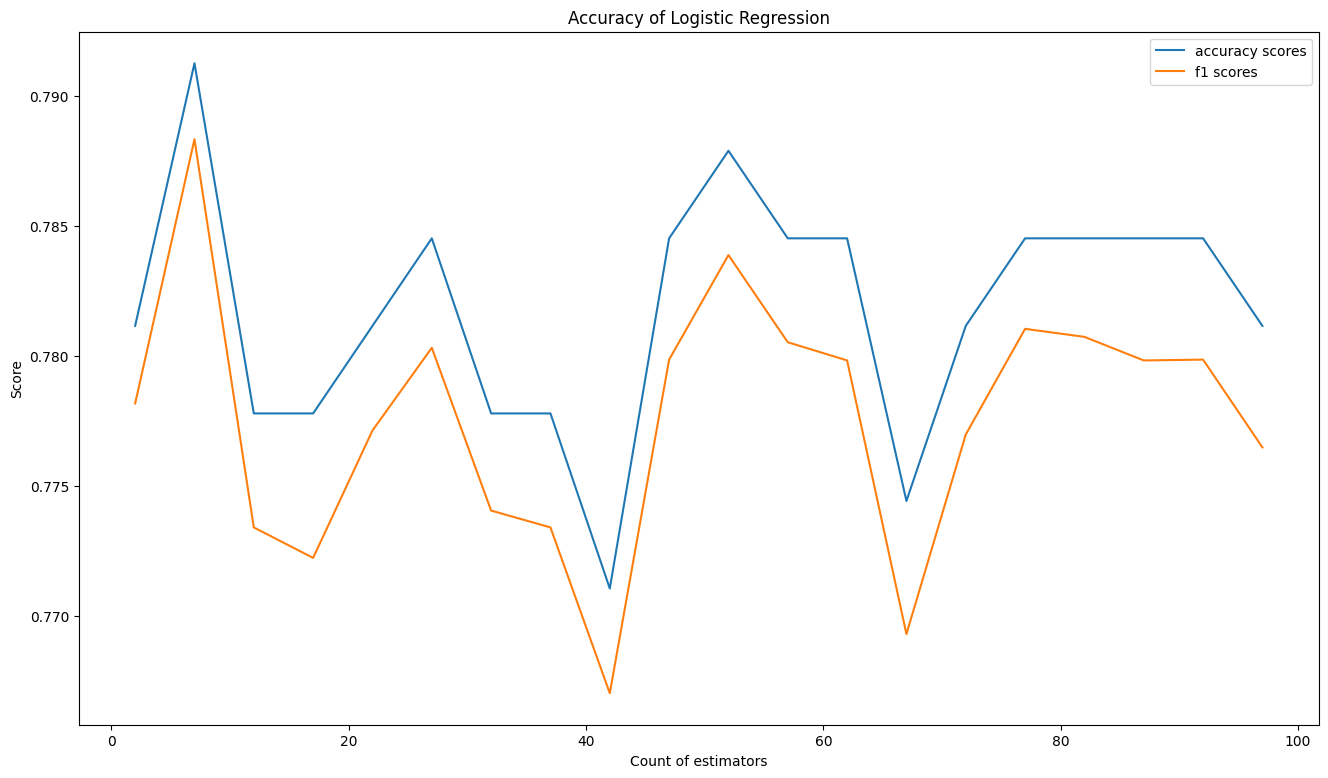

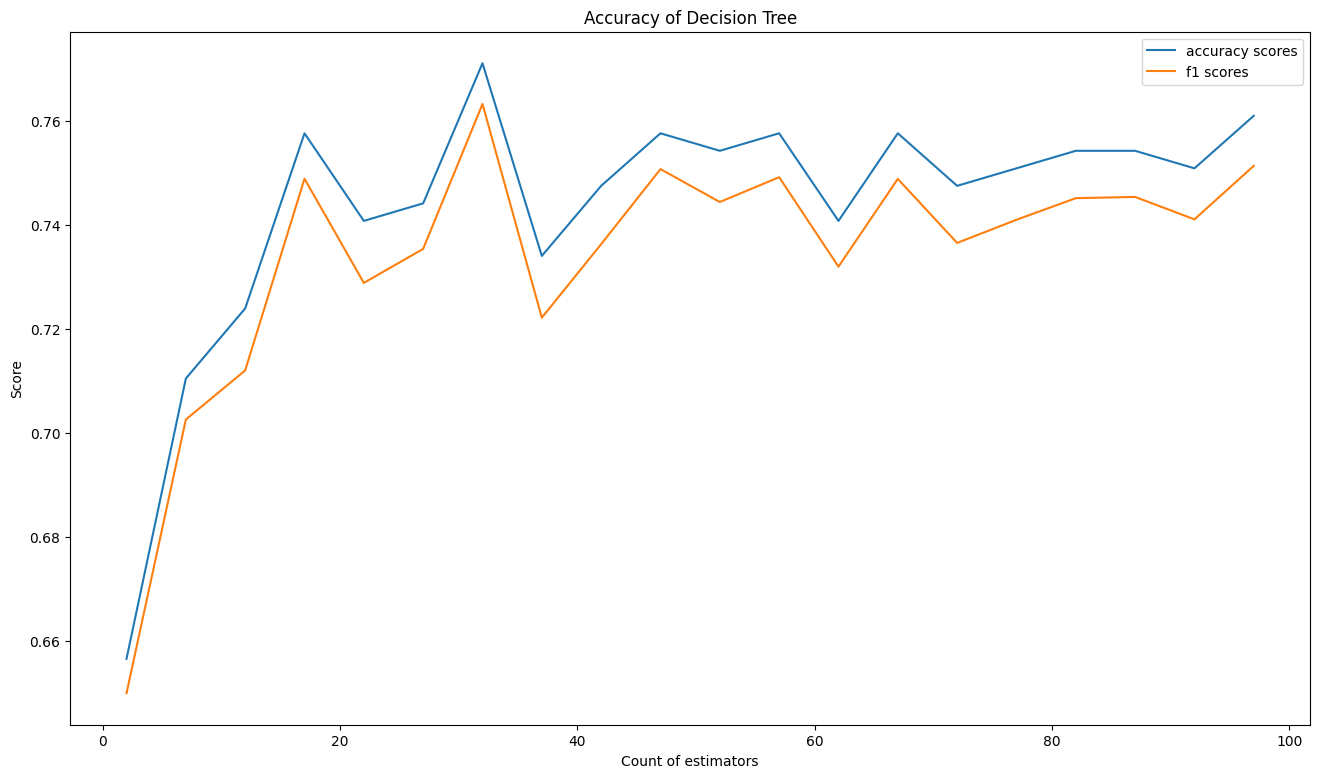

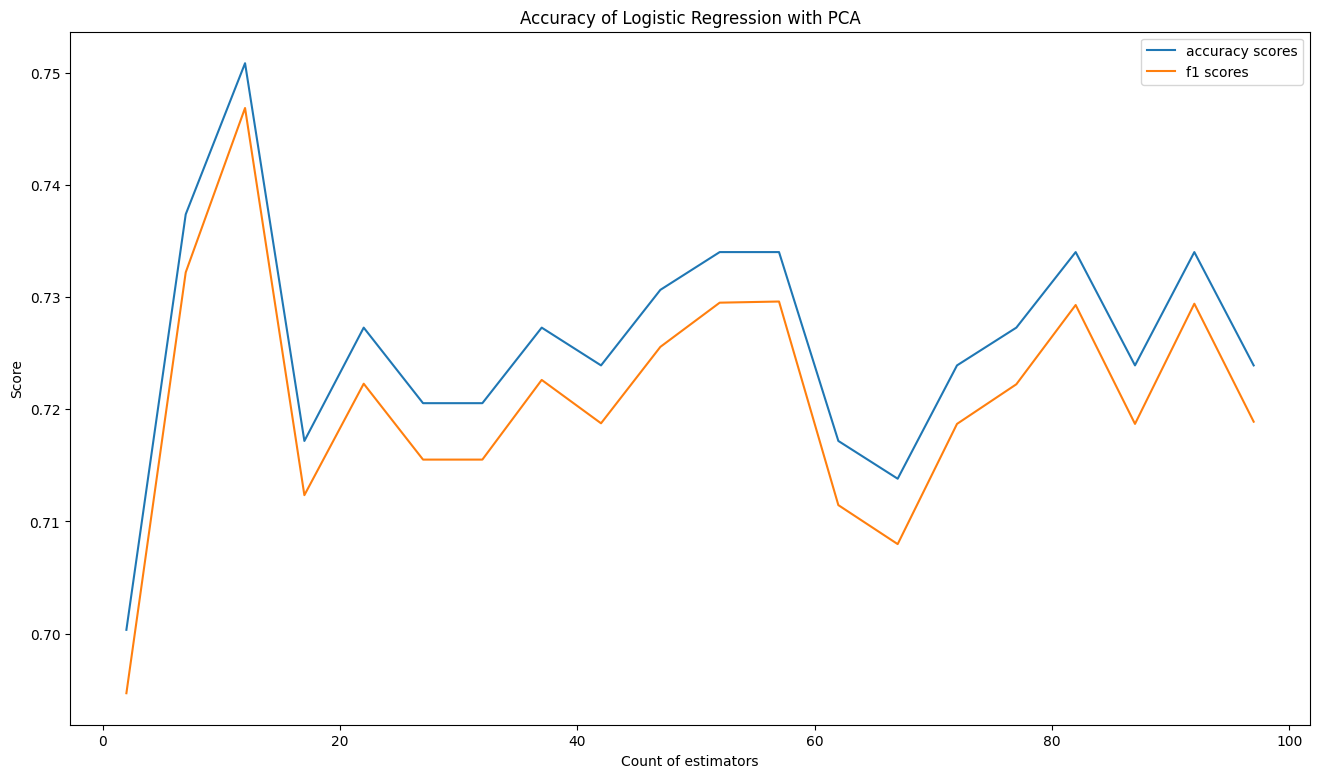

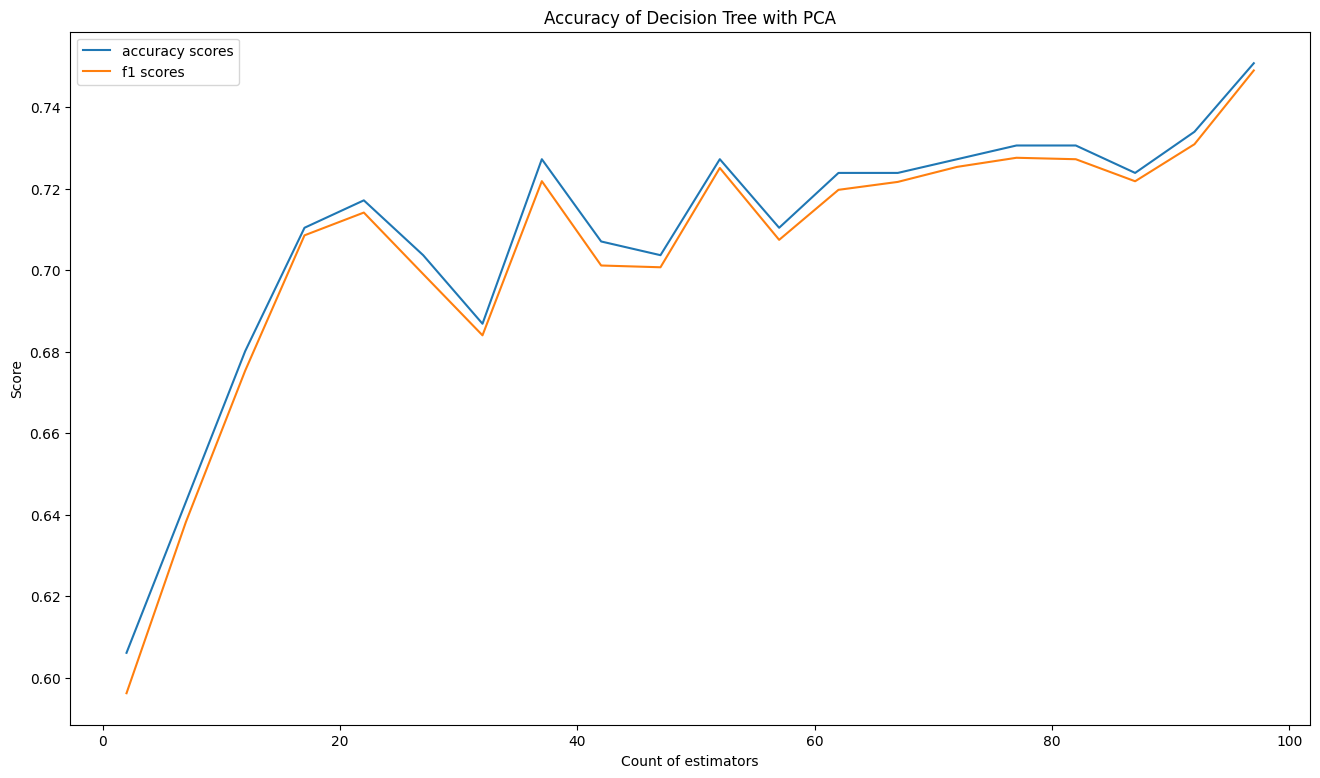

In [59]:
from sklearn.ensemble import BaggingClassifier

N_min, N_max, step = 2, 100, 5

def bagging(estimator, estimator_name, data_train, target_train, data_test, target_test):
    accuracy_scores = []
    f1_scores = []

    for n_estimators in range(N_min, N_max, step):
        bagging = BaggingClassifier(estimator, n_estimators)
        best_model = bagging.fit(data_train, target_train)

        target_pred = best_model.predict(data_test)

        accuracy_score = sk_accuracy_score(target_test, target_pred)
        f1_score = sk_f1_score(target_test, target_pred, average='weighted')
        accuracy_scores.append(accuracy_score)
        f1_scores.append(f1_score)

    grid = np.arange(N_min, N_max, step)

    plt.figure(figsize=(16, 9))
    plt.plot(grid, accuracy_scores, label="accuracy scores")
    plt.plot(grid, f1_scores, label="f1 scores")
    plt.title("Accuracy of {}".format(estimator_name))
    plt.xlabel("Count of estimators")
    plt.ylabel("Score")
    plt.legend()
    plt.show()

bagging(LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, penalty='l1', C=15, max_iter=1000, random_state=199), 'Logistic Regression', X_train, y_train, X_test, y_test)

bagging(DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=199), 'Decision Tree', X_train, y_train, X_test, y_test)

bagging(LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, penalty='l1', C=15, max_iter=1000, random_state=199), 'Logistic Regression with PCA', pca_X_train, y_train, pca_X_test, y_test)

bagging(DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=199), 'Decision Tree with PCA', pca_X_train, y_train, pca_X_test, y_test)

Actually too big ensemble size doesn't make sense because it's just become random. The optimal size is 15-20 for normal data and about 40 for data with PCA.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

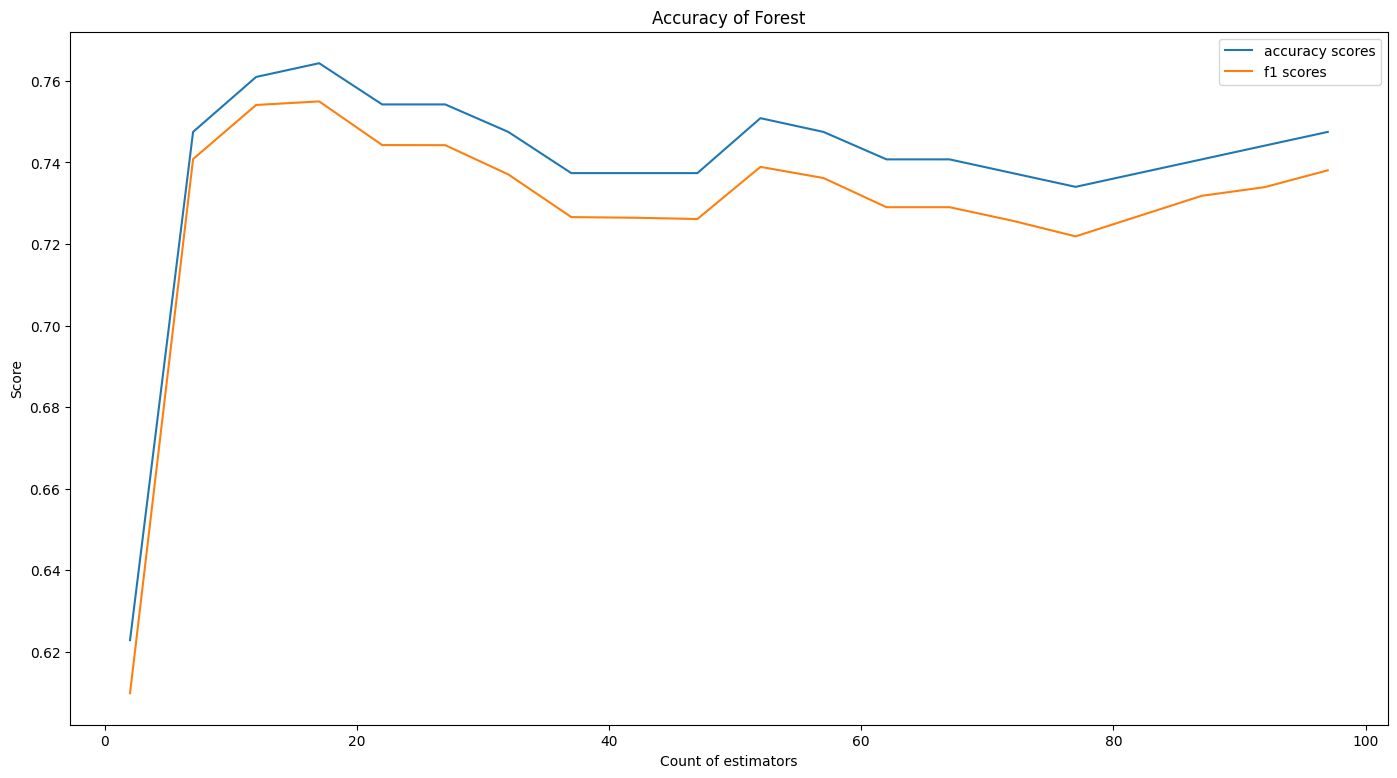

In [60]:
from sklearn.ensemble import RandomForestClassifier

estimators_grid = np.arange(N_min, N_max, step)
accuracy_scores = []
f1_scores = []
for n_estimators in estimators_grid:
    forest = RandomForestClassifier(n_estimators=n_estimators, criterion='entropy', max_depth=12, random_state=199)
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_test)
    accuracy_score = sk_accuracy_score(y_test, y_pred)
    f1_score = sk_f1_score(y_test, y_pred, average='weighted')

    accuracy_scores.append(accuracy_score)
    f1_scores.append(f1_score)

grid = np.arange(N_min, N_max, step)

plt.figure(figsize=(17, 9))
plt.plot(grid, accuracy_scores, label="accuracy scores")
plt.plot(grid, f1_scores, label="f1 scores")
plt.title("Accuracy of Forest")
plt.xlabel("Count of estimators")
plt.ylabel("Score")
plt.legend()
plt.show()

The optimal number of trees is 15-20. In 2.6 optimal number of logistic regressions and decision trees is 15-20 too. But with PCA optimal number increases to 40. This is to be expected since the methods are similar, and with PCA we need much more iterations. Also Trees and Forests much faster than Logistic Regression, but their results are worse.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

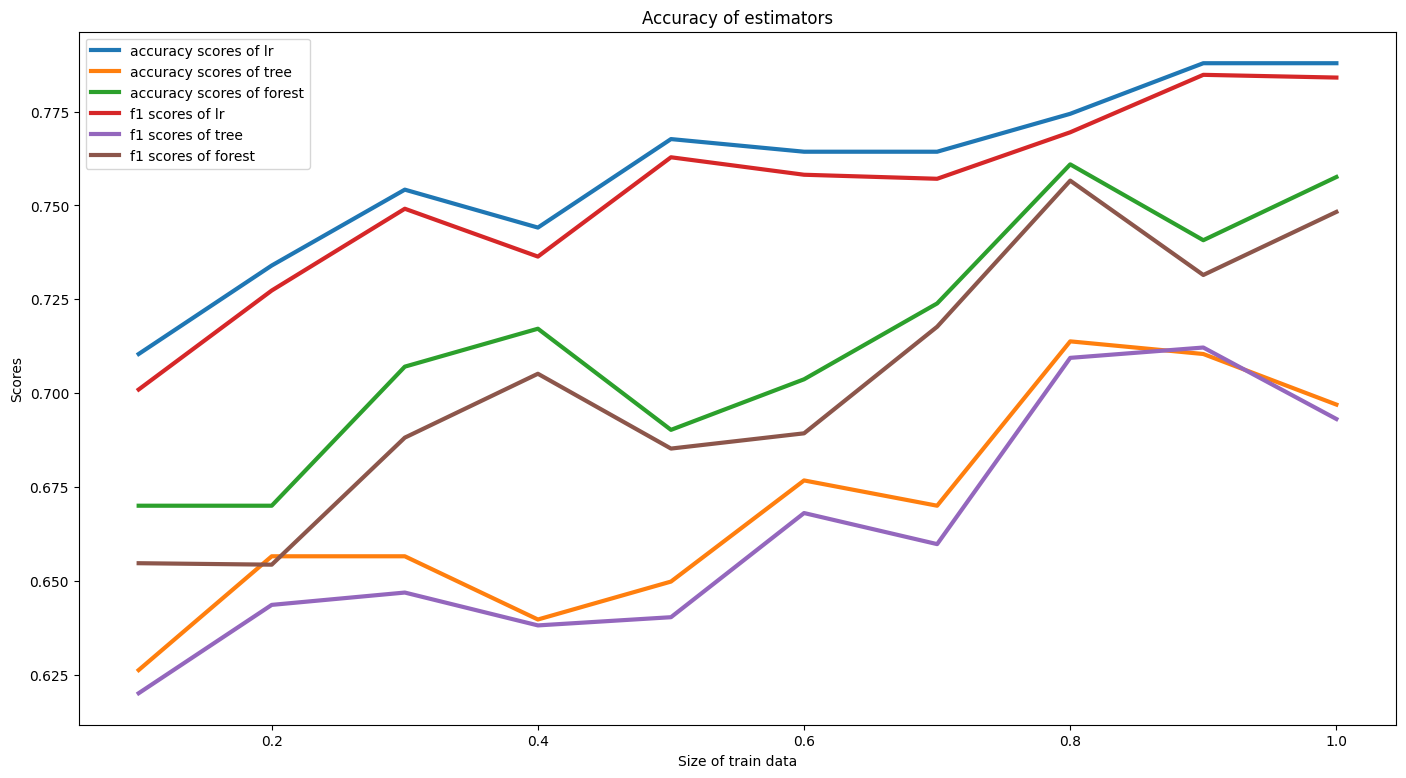

In [61]:
train_sizes = np.linspace(0.1, 1.0, 10)

f1_scores = {
    'lr': [],
    'tree': [],
    'forest': [],
}
accuracy_scores = {
    'lr': [],
    'tree': [],
    'forest': [],
}

def get_scores(estimator, estimator_name, data_train, target_train, data_test, target_test):
    estimator.fit(data_train, target_train)
    target_pred = estimator.predict(data_test)

    accuracy_score = sk_accuracy_score(target_test, target_pred)
    f1_score = sk_f1_score(target_test, target_pred, average='weighted')

    accuracy_scores[estimator_name].append(accuracy_score)
    f1_scores[estimator_name].append(f1_score)

for train_size in train_sizes:
    curr_data = 0
    curr_target = 0
    if train_size == 1.0:
        curr_data = X_train
        curr_target = y_train
    else:
        curr_data, _, curr_target, _ = train_test_split(X_train, y_train, train_size=train_size, random_state=199)

    get_scores(LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, penalty='l1', C=15, max_iter=1000, random_state=199), 'lr', curr_data, curr_target, X_test, y_test)
    get_scores(DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=199), 'tree', curr_data, curr_target, X_test, y_test)
    get_scores(RandomForestClassifier(n_estimators=15, criterion='entropy', max_depth=12, random_state=199), 'forest', curr_data, curr_target, X_test, y_test)


plt.figure(figsize=(17, 9))
for estimator in accuracy_scores:
    plt.plot(train_sizes, accuracy_scores[estimator], label="accuracy scores of {}".format(estimator), linewidth=3)
for estimator in f1_scores:
    plt.plot(train_sizes, f1_scores[estimator], label="f1 scores of {}".format(estimator), linewidth=3)

plt.title("Accuracy of estimators")
plt.xlabel("Size of train data")
plt.ylabel("Scores")
plt.legend()
plt.show()

As we can see Logistic Regression is much better on _any_ size of train data. Forest and Decision Tree have good improvements with growing size of train data. They look quite similar.